## Load Default

### Parte 0: 16:50

* ID: identificatore del richiedente 
* year: anno della richiesta di prestito 
* Gender: sesso del richiedente 
* age: età del richiedente 
* approv_in_adv: indica se il prestito è stato approvato in anticipo (pre) oppure no (nopre) 
* loan_type: tipo di prestito 
* loan_purpose: scopo del prestito 
* open_credit: indica se il richiedente ha conti a credito aperti (opc) oppure no (nopc) 
* business_or_commercial: indica se il prestito ha scopi commerciali (b/c) oppure no (nob/c) 
* loan_amount: importo del prestito 
* rate_of_interest: tasso d'interesse applicato al prestito 
* term: durata del prestito in mesi 
* lump_sum_payment: indica se alla fine del prestito è richiesto un pagamento forfettario 
* property_value: valore della proprietà per cui si chiede il prestito 
* construction_type: tipo di costruzione (sb - sito costruito, mh - fabbricato) 
* occupancy_type:  tipo  di  occupazione  (pr  -residenza  primaria,  sr  -res.  second.,  ir  -inv. 
immob.) 
* total_units: numero di unità del bene oggetto del finanziamento (1U, 2U, 3U, 4U) 
* income: redummy_modelito annuo del richiedente 
* credit_type: tipo di credito del richiedente 
* Credit_Score: credit score del richiedente 
* co-applicant_credit_type: tipo di credito del co-richiedente 
* submission_of_application: modalità di presentazione della richiesta 
* Region: regione geografica in cui si trova la proprietà (nord, sud, centro, nord-est) 
* Status: indica se il prestito è in stato di inadempimento (1) oppure no (0)

In [25]:
import pandas as pd

data = pd.read_csv('./dataset.csv', sep=',')
data.head()

,ID,year,Gender,approv_in_adv,loan_type,loan_purpose,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,occupancy_type,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,Region,Status
0,24890,2019,Sex Not Available,nopre,type1,p1,nopc,nob/c,116500,NaN,...,pr,1U,1740.0,EXP,758.0,CIB,25-34,to_inst,south,0
1,24891,2019,Male,nopre,type2,p1,nopc,b/c,206500,NaN,...,pr,1U,4980.0,EQUI,552.0,EXP,55-64,to_inst,North,1
2,24892,2019,Male,pre,type1,p1,nopc,nob/c,406500,4.56,...,pr,1U,9480.0,EXP,834.0,CIB,35-44,to_inst,south,1
3,24893,2019,Male,nopre,type1,p4,nopc,nob/c,456500,4.25,...,pr,1U,11880.0,EXP,587.0,CIB,45-54,not_inst,North,0
4,24894,2019,Joint,pre,type1,p1,nopc,nob/c,696500,4.00,...,pr,1U,10440.0,CRIF,602.0,EXP,25-34,not_inst,North,0


### Parte 1

#### P1 Q1
1.

In [26]:
data['property_value'].value_counts()
data['loan_amount'].value_counts()

loan_amount
206500     718
156500     596
226500     593
256500     581
236500     557
          ... 
1256500      1
1286500      1
2476500      1
1446500      1
1756500      1
Name: count, Length: 156, dtype: int64

In [27]:
n_instances = data.index.size
completness = not data.isna().any().any()
values = data['Status'].value_counts()

print(f'Numero di righe nel dataset: {n_instances}')
print(f'Il dataset è completo? {completness}')
print(f'Il dataset è bilanciato? {values}') # Sì, il dataset è bilanciato

Numero di righe nel dataset: 21944
Il dataset è completo? False
Il dataset è bilanciato? Status
1    11014
0    10930
Name: count, dtype: int64


#### P1 Q2
2.

In [28]:
data['ratio'] = data['loan_amount'] / data['property_value']
mean_ratio_per_units = data.groupby('total_units')['ratio'].mean()
print('Valore medio del ratio per total_units:')
print(mean_ratio_per_units)

## No, non si può affermare che il rapporto aumenta all'aumentare del numero di unità, al contrario,
## sembra che diminuisca

Valore medio del ratio per total_units:
total_units
1U    0.732230
2U    0.612850
3U    0.586999
4U    0.607033
Name: ratio, dtype: float64


#### P1 Q3
3. (da rivedere)

In [29]:
# Richiedenti con più di 55 anni
grt_than_55_mask = data['age'].isin(['55-64', '65-74', '>74'])

data_over_55 = data[grt_than_55_mask]

data_over_55['credit_score_binned'] = pd.cut(data_over_55['Credit_Score'], bins=5)
data_over_55['income_binned'] = pd.cut(data_over_55['income'], bins=5)

pivot = pd.pivot_table(data=data_over_55, 
                       index='credit_score_binned', 
                       columns='income_binned', 
                       values='Status', 
                       aggfunc=['mean', 'count'])

print('Probabilità di essere in regola con i pagamenti (Status 1)')
display(pivot)

Probabilità di essere in regola con i pagamenti (Status 1)


mean                                        \
income_binned       (-146.22, 29244.0] (29244.0, 58488.0] (58488.0, 87732.0]   
credit_score_binned                                                            
(499.6, 580.0]                0.493961           0.555556                1.0   
(580.0, 660.0]                0.502497           0.300000                NaN   
(660.0, 740.0]                0.480712           0.600000                0.5   
(740.0, 820.0]                0.518094           0.375000                0.4   
(820.0, 900.0]                0.472716           0.555556                0.5   

                                                      count  \
income_binned       (116976.0, 146220.0] (-146.22, 29244.0]   
credit_score_binned                                           
(499.6, 580.0]                       NaN             1656.0   
(580.0, 660.0]                       0.0             1602.0   
(660.0, 740.0]                       NaN             1685.0   
(740.0, 820.0]                       0.0             1658.0   
(820.0, 900.0]                       NaN             1686.0   

                                                                                
income_binned       (29244.0, 58488.0] (58488.0, 87732.0] (116976.0, 146220.0]  
credit_score_binned                                                             
(499.6, 580.0]                     9.0                4.0                  NaN  
(580.0, 660.0]                    10.0                NaN                  1.0  
(660.0, 740.0]                     5.0                2.0                  NaN  
(740.0, 820.0]                     8.0                5.0                  1.0  
(820.0, 900.0]                     9.0                4.0                  NaN

No, dalla tabella pivot non si evince una relazione lineare chiara. Notiamo inoltre che l'uso <br>
di pd.cut concentra la maggior parte delle persone nei primi due scaglioni, mentre abbiamo pochi campioni <br>
per gli altri tre intervalli. Il campione è troppo piccolo per trarre conclusioni statisticamente valide.

#### P1 Q4
4. 

Prima casa: probabilità che sia adempiente: 0.5022544599098216
Altre tipologie: probabilità che sia adempiente: 0.4974025974025974


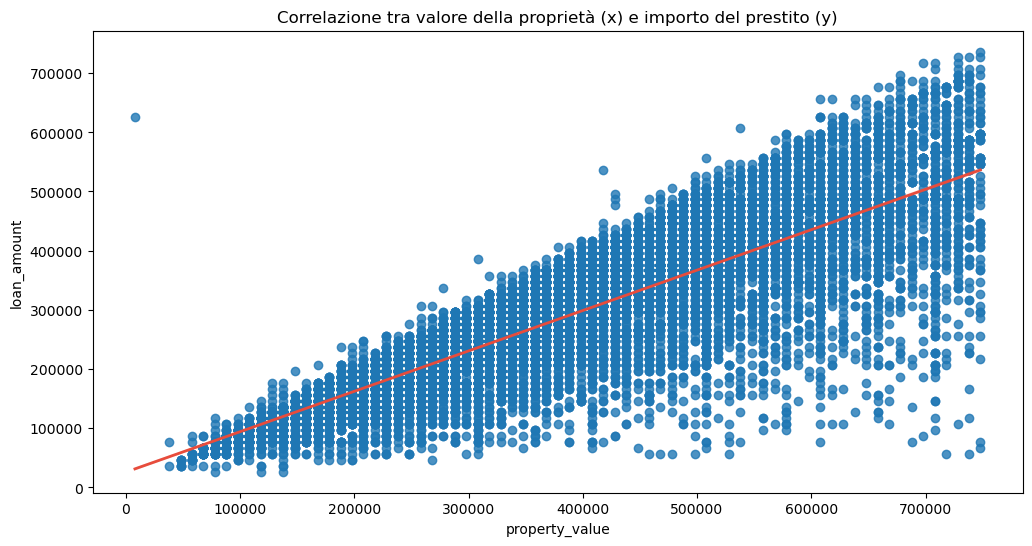

In [38]:
pr_status_probability = data[data['occupancy_type'] == 'pr']['Status'].mean()
oth_status_probability = data[data['occupancy_type'] != 'pr']['Status'].mean()

print(f'Prima casa: probabilità che sia adempiente: {pr_status_probability}')
print(f'Altre tipologie: probabilità che sia adempiente: {oth_status_probability}')

## Dai dati si evince che non è vero che chi chiede un prestito per la residenza primaria
## sia meno inadempiente rispetto agli altri

import seaborn as sns
import matplotlib.pyplot as plt 

data_plot = data[data['occupancy_type'] == 'pr']
data_plot = data_plot[data_plot['property_value'] < 750000]

plt.figure(figsize=(12,6))
plt.title('Correlazione tra valore della proprietà (x) e importo del prestito (y)')
sns.regplot(data_plot, x='property_value', y='loan_amount',
            line_kws={'color': '#e74c3c', 'linewidth': 2})
plt.ticklabel_format(style='plain', axis='both') 
plt.show()

# CONCLUSIONI:
# 1. Ho concentrato l'analisi sulle residenze primarie non extra lusso, filtrando property_value < 750k.
# 2. Dai dati si evince una forte correlazione positivo tra property_value e loan_amount.
# 3. Inoltre è possibile vedere che è presente un tetto superiore: la banca non concede un prestito maggiore
#    rispetto al valore della proprietà.

## Parte 2

#### P2 Q1
1.

In [ ]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('./dataset.csv', sep=',')

## ID è unidentificatore univoco cardinale. Non possiede alcun potere predittivo.
## l'analisi precedente ha mostrato che occupancy_type non influenza l'inadempimento
cols_to_drop = ['ID', 'occupancy_type']
data = data.drop(columns=cols_to_drop)

## Elimino le istanze che contengono valori nulli
data = data.dropna(how='any')

## Trasformo i valori categorici
data_transformed = pd.get_dummies(data=data)
X = data_transformed.drop(columns=['Status'])
y = data_transformed['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=42, stratify=y)

In [ ]:
# ExtraTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.tree import ExtraTreeClassifier

etree_model = ExtraTreeClassifier()

etree_model.fit(X_train, y_train)

y_pred_train = etree_model.predict(X_train)
y_pred_test_etree = etree_model.predict(X_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test_etree)

print('Extra Tree Classifier')

print(f'F1 score train: {f1_train}')
print(f'Confusion matrix train:')
print(confusion_matrix(y_train, y_pred_train))

print(f'F1 score test: {f1_test}')
print(f'Confusion matrix test:')
print(confusion_matrix(y_test, y_pred_test_etree))

Extra Tree Classifier
F1 score train: 1.0
Confusion matrix train:
[[5763    0]
 [   0 5736]]
F1 score test: 0.5023207839092315
Confusion matrix test:
[[930 992]
 [938 974]]


### ExtraTreeClassifier: performances
1. **Train**: Ha un F1-Score di 1.0. Dalla matrice di confusione si nota che non ha commesso alcun errore di classificazione.
2. **Test**: L'F1-Score crolla a ~0.50. La matrice mostra un alto numero di Falsi Positivi e Falsi Negativi.
3. **Conclusione**: Il modello è in palese overfitting. Avendo lasciato i parametri di default (senza limitare la max_depth), l'albero è cresciuto a dismisura fino a memorizzare a memoria i dati di training, perdendo del tutto la capacità di generalizzare sui dati nuovi.

In [ ]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

y_pred_train = knn_model.predict(X_train)
y_pred_test_knn = knn_model.predict(X_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test_knn)

print('KNN Classifier')

print(f'F1 score train: {f1_train}')
print(f'Confusion matrix train:')
print(confusion_matrix(y_train, y_pred_train))

print(f'F1 score test: {f1_test}')
print(f'Confusion matrix test:')
print(confusion_matrix(y_test, y_pred_test_knn))

KNN Classifier
F1 score train: 0.6780017528483786
Confusion matrix train:
[[3957 1806]
 [1868 3868]]
F1 score test: 0.4768493879723257
Confusion matrix test:
[[ 972  950]
 [1016  896]]


### KNeighborsClassifier (KNN):

1. **Risultati**: Le metriche di training e test sono più vicine tra loro rispetto all'albero, indicando un minor overfitting.
2. **Conclusione**: Le performance complessive sono modeste. Questo è in gran parte imputabile all'assenza di scaling/normalizzazione dei dati. 

In [13]:
# Dummy Classifier
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier()
dummy_model.fit(X_train, y_train)

y_pred_train = dummy_model.predict(X_train)
y_pred_test = dummy_model.predict(X_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print('Dummy Classifier')

print(f'F1 score train: {f1_train}')
print(f'Confusion matrix train:')
print(confusion_matrix(y_train, y_pred_train))

print(f'F1 score test: {f1_test}')
print(f'Confusion matrix test:')
print(confusion_matrix(y_test, y_pred_test))

## Il dummy dà f1 score pari a 0 come atteso

Dummy Classifier
F1 score train: 0.0
Confusion matrix train:
[[5763    0]
 [5736    0]]
F1 score test: 0.0
Confusion matrix test:
[[1922    0]
 [1912    0]]


### Dummy Classifier:

1. **Risultati**: Presenta un F1-Score di 0.0 per la classe minoritaria/positiva.
2. **Conclusione**: Dalla matrice di confusione si evince chiaramente la strategia usata dal Dummy (di default prevede sempre la classe più frequente, in questo caso lo '0'). Avendo predetto solo Zeri, ha mancato tutti i veri positivi (1912 falsi negativi nel test set). 

#### P2 Q2
2.

In [14]:
from sklearn.model_selection import cross_validate

cv_etree = cross_validate(estimator=etree_model, X=X_test, y=y_test, cv=10, scoring='f1')
cv_knn = cross_validate(estimator=knn_model, X=X_test, y=y_test, cv=10, scoring='f1')
cv_dummy= cross_validate(estimator=dummy_model, X=X_test, y=y_test, cv=10, scoring='f1')

etree_cv_mean = cv_etree['test_score'].mean()
knn_cv_mean = cv_knn['test_score'].mean()
dummy_cv_mean = cv_dummy['test_score'].mean()

print(f'Mean f1 score of Etree with 10 Fold CV: {etree_cv_mean}')
print(f'Mean f1 score of KNN with 10 Fold CV: {knn_cv_mean}')
print(f'Mean f1 score of Dummy with 10 Fold CV: {dummy_cv_mean}')

Mean f1 score of Etree with 10 Fold CV: 0.5033437101189617
Mean f1 score of KNN with 10 Fold CV: 0.5085135216387701
Mean f1 score of Dummy with 10 Fold CV: 0.0


#### P2 Q3
3.

In [15]:
female_mask = X_test['Gender_Female'] == 1
male_mask = X_test['Gender_Male'] == 1

print(f'Etree: Probabilità di essere inadempiente e donna: {1 - y_pred_test_etree[female_mask].mean()}')
print(f'Etree: Probabilità di essere inadempiente e uomo: {1 - y_pred_test_etree[male_mask].mean()}')
print(f'KNN: Probabilità di essere inadempiente e donna: {1 - y_pred_test_knn[female_mask].mean()}')
print(f'KNN: Probabilità di essere inadempiente e uomo: {1 - y_pred_test_knn[male_mask].mean()}')

## Per Etree la probabilità è la stessa
## Per KNN invece sembra che la probabilità di essere donna e inadempiente sia maggiore rispetto agli uomini

Etree: Probabilità di essere inadempiente e donna: 0.46002460024600245
Etree: Probabilità di essere inadempiente e uomo: 0.4790076335877863
KNN: Probabilità di essere inadempiente e donna: 0.5498154981549815
KNN: Probabilità di essere inadempiente e uomo: 0.5104961832061068


#### P2 Q4
4.

In [16]:
correlation_matrix = data.select_dtypes(include=['number']).corr()
corr_con_target = correlation_matrix['Status'].drop(labels=['Status'])

top_2_pos = corr_con_target.nlargest(2).index.to_list()
top_2_neg = corr_con_target.nsmallest(2).index.to_list()

print(f'Top 2 positive: {top_2_pos}')
print(f'Top 2 negative: {top_2_neg}')

X_corr = data[top_2_pos + top_2_neg]
y_corr = data['Status']

X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(X_corr, 
                                                                        y_corr, 
                                                                        train_size=.75, 
                                                                        random_state=42)

etree_model_corr = ExtraTreeClassifier()
etree_model_corr.fit(X_train_corr, y_train_corr)

y_pred_train_corr = etree_model_corr.predict(X_train_corr)
y_pred_test_etree_corr = etree_model_corr.predict(X_test_corr)

f1_train_corr = f1_score(y_train_corr, y_pred_train_corr)
f1_test_corr = f1_score(y_test_corr, y_pred_test_etree_corr)

print('Extra Tree Classifier')

print(f'F1 score train: {f1_train_corr}')
print(f'Confusion matrix train:')
print(confusion_matrix(y_train_corr, y_pred_train_corr))

print(f'F1 score test: {f1_test_corr}')
print(f'Confusion matrix test:')
print(confusion_matrix(y_test_corr, y_pred_test_etree_corr))

Top 2 positive: ['rate_of_interest', 'term']
Top 2 negative: ['loan_amount', 'income']
Extra Tree Classifier
F1 score train: 0.9805619367379396
Confusion matrix train:
[[5730   11]
 [ 209 5549]]
F1 score test: 0.4619550500947739
Confusion matrix test:
[[ 994  950]
 [1037  853]]


#### P2 Q5
5.

In [17]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 5, 10, 15, 20]
}

cv = GridSearchCV(ExtraTreeClassifier(random_state=42), param_grid=params, cv=5, scoring='f1').fit(X_train, y_train)

print(f'Score della configurazione migliore: {cv.best_score_}')
print(f'Configurazione migliore trovata: {cv.best_params_}')

## l'f1-score non sembra migliorare neanche con i parametri migliori possibili

Score della configurazione migliore: 0.48893162294608244
Configurazione migliore trovata: {'criterion': 'gini', 'max_depth': 20}


#### P2 Q6
6.

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler

preprocessing = ColumnTransformer(transformers=[
    ('discretized', KBinsDiscretizer(n_bins=7, quantile_method='linear'), ['income', 'loan_amount']),
    ('scaled', StandardScaler(), ['Credit_Score'])
], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('model', ExtraTreeClassifier(criterion='gini', max_depth=20))
])

pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('discretized', ...), ('scaled', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the differ

In [20]:
y_predict_pipeline = pipeline.predict(X_test)

print(f'f1-score con pipeline: {f1_score(y_test, y_predict_pipeline)}')

f1-score con pipeline: 0.48792270531400966


#### P2 Q7
7.

In [21]:
from sklearn.decomposition import TruncatedSVD

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('dimred', TruncatedSVD()),
    ('model', ExtraTreeClassifier())
])

params = {
    'dimred__n_components': [2, 5, 10],
    'model__criterion': ['gini', 'entropy', 'log_loss'],
    'model__max_depth': [5, 10, 20]
}

cv = GridSearchCV(pipeline, param_grid=params, cv=5).fit(X_train, y_train)

cv.best_score_

np.float64(0.5126538192408797)